In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **TensorFlow importation**


In [36]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


# Dataset importation from tensorflow

In [37]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Definition of the different class names

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Analysis of the shape of the train data

In [39]:
train_images.shape

(60000, 28, 28)

In [40]:
len(train_labels)

60000

In [41]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [42]:
test_images.shape

(10000, 28, 28)

In [43]:
len(test_labels)

10000

# Plot the color analysis

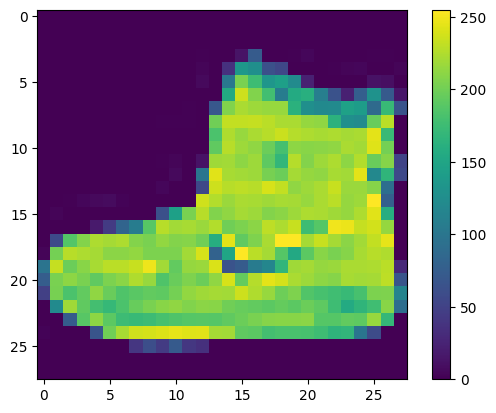

In [44]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [45]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Display the different type of images

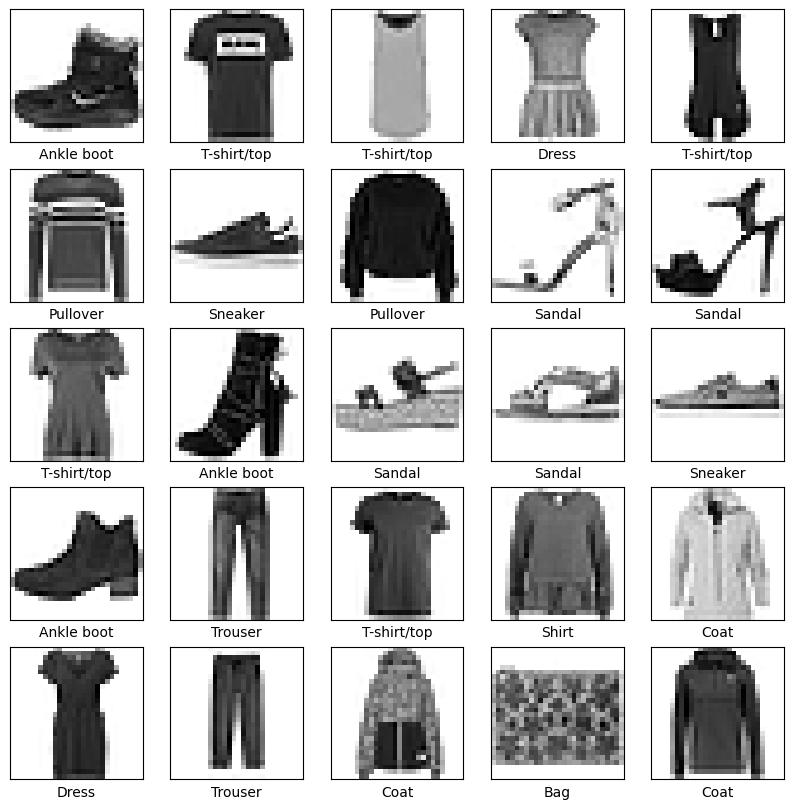

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Defining the model

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


# Defining the metrics

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model training

In [49]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3991 - accuracy: 0.8574
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2710 - accuracy: 0.9021
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2259 - accuracy: 0.9167
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1946 - accuracy: 0.9285
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1676 - accuracy: 0.9367
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1457 - accuracy: 0.9459
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1239 - accuracy: 0.9547
Epoch 8/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1064 - accuracy: 0.9609
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0897 - accuracy: 0.9670
Epoch 10/10
1875/1875 [==============================] - 26s 14m

# Metrics

In [50]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3153 - accuracy: 0.9108 - 1s/epoch - 5ms/step

Test accuracy: 0.9107999801635742


In [51]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [52]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [53]:
predictions[0]

array([1.2089083e-08, 8.4858197e-12, 6.2009391e-08, 2.2281223e-10,
       1.6620407e-07, 2.3093607e-08, 2.2393040e-08, 5.7158049e-06,
       2.8478464e-09, 9.9999398e-01], dtype=float32)

In [54]:
np.argmax(predictions[0])

9

# Function to display with a plot the probability of an image

In [55]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

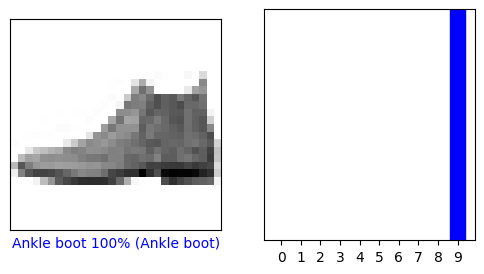

In [56]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

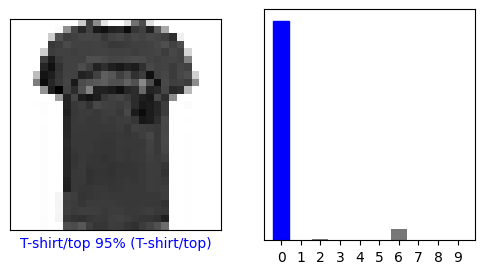

In [67]:
i = 19
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

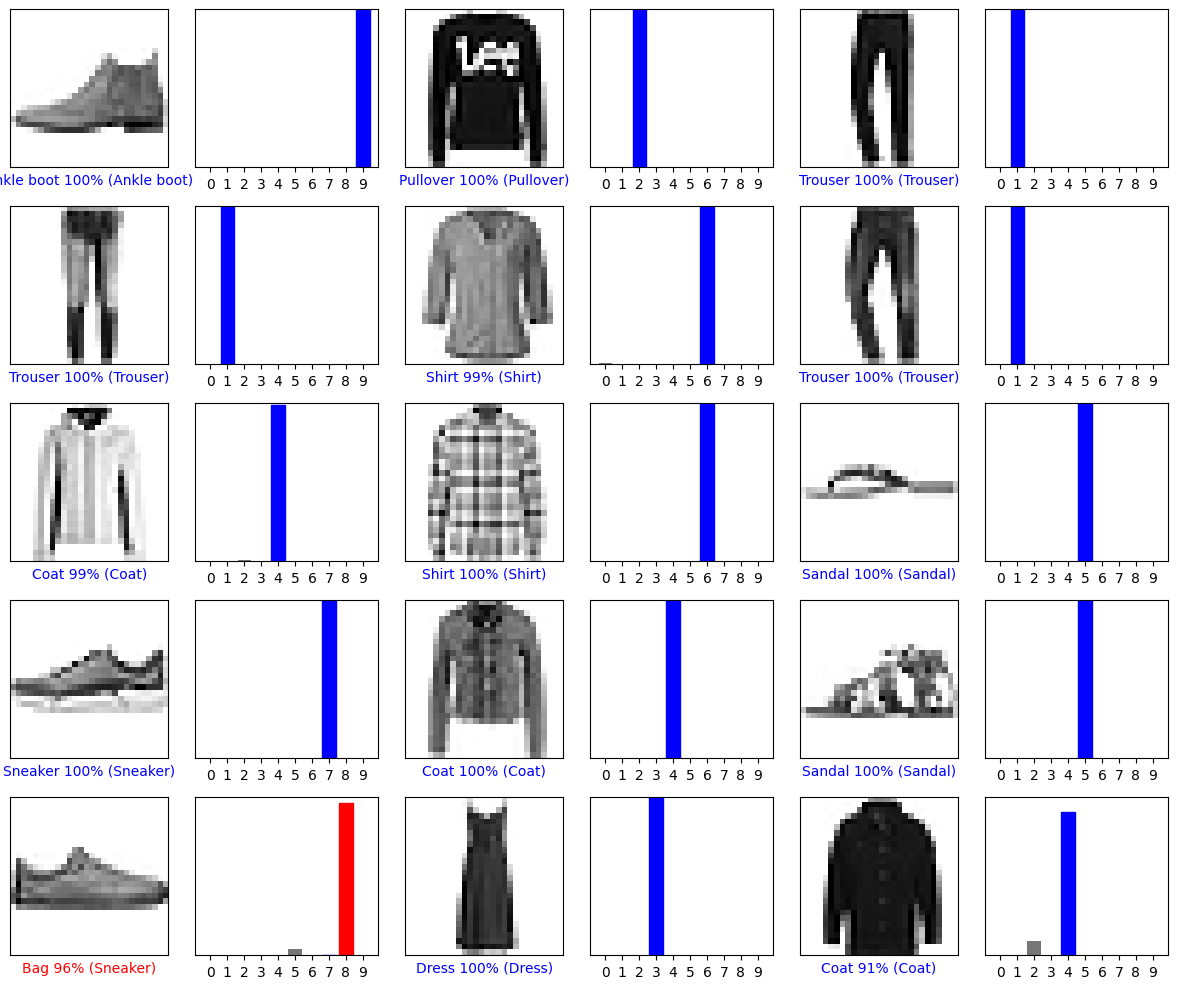

In [58]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [59]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [60]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [61]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[1.2375736e-07 1.1156096e-23 9.9999952e-01 1.7166765e-10 6.4509167e-09
  2.3806420e-11 3.7928663e-07 2.4249395e-15 3.3563049e-17 3.2407941e-16]]


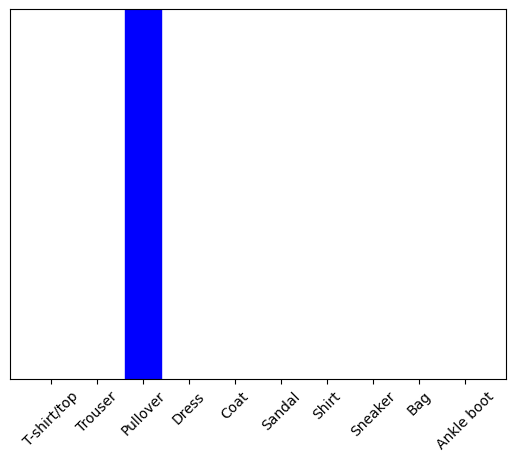

In [62]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [63]:
np.argmax(predictions_single[0])

2